Importing the Dependencies

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Log** Based Tranformation

Enter the path of the image:/content/drive/MyDrive/Colab Notebooks/Data/Kitty_cat.jpg


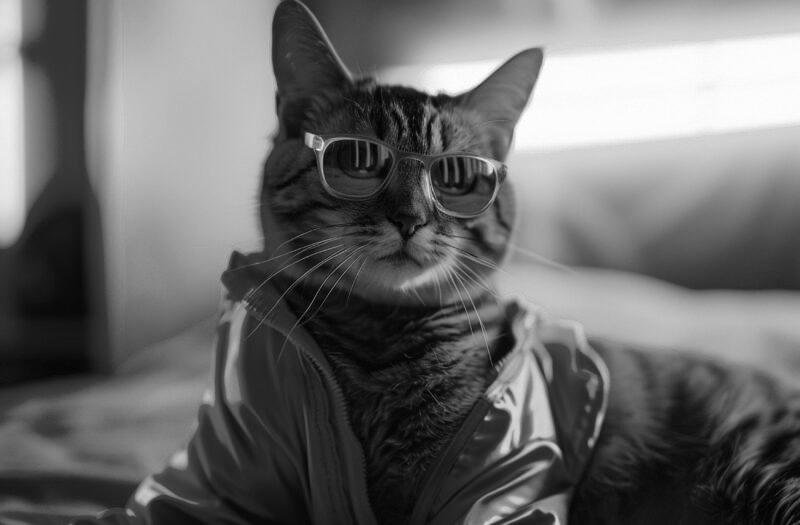

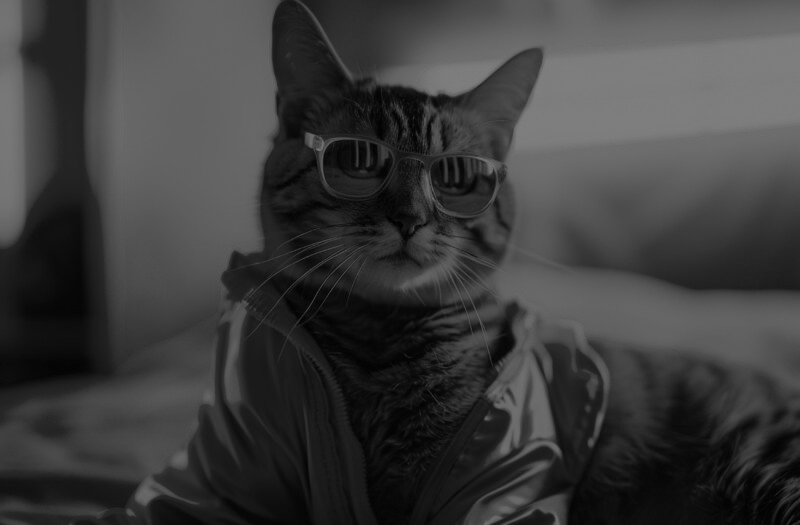

[[0.83921569 0.84313725 0.84705882 ... 0.64705882 0.64705882 0.64705882]
 [0.84313725 0.84313725 0.84705882 ... 0.65098039 0.65098039 0.65098039]
 [0.84313725 0.84705882 0.84705882 ... 0.65882353 0.65882353 0.65882353]
 ...
 [0.28235294 0.30980392 0.34117647 ... 0.23137255 0.25490196 0.2745098 ]
 [0.23921569 0.26666667 0.29019608 ... 0.23137255 0.18823529 0.1372549 ]
 [0.22745098 0.23921569 0.25490196 ... 0.16470588 0.1372549  0.0745098 ]]
[[111.72394053 112.11446808 112.5041656  ...  91.49133559  91.49133559
   91.49133559]
 [112.11446808 112.11446808 112.5041656  ...  91.92737055  91.92737055
   91.92737055]
 [112.11446808 112.5041656  112.5041656  ...  92.79634192  92.79634192
   92.79634192]
 ...
 [ 45.59917688  49.48273601  53.82264551 ...  38.1610774   41.63157752
   44.47431068]
 [ 39.3252249   43.34250081  46.7171841  ...  38.1610774   31.62269004
   23.58233267]
 [ 37.57622007  39.3252249   41.63157752 ...  27.95551548  23.58233267
   13.17655529]]


In [ ]:
image_path=input("Enter the path of the image:")
real_image=cv2.imread(image_path)

#to grayscale
grayscale_image=cv2.cvtColor(real_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale_image)
grayscale_image=grayscale_image/255
transformed_image=422.185*(np.log10(grayscale_image+1))
cv2_imshow(transformed_image)
print(grayscale_image)
print(transformed_image)

**Gamma** Based Transformation

Enter the path of the image:/content/drive/MyDrive/Colab Notebooks/Data/figure7.jpg
Enter the value of gamma less than 1:0.6
Enter the value of gamma more than 1:1.5


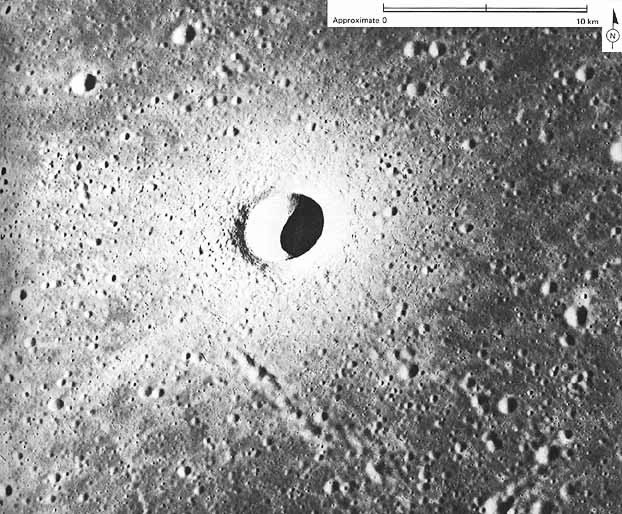

The Gamma less than 1:


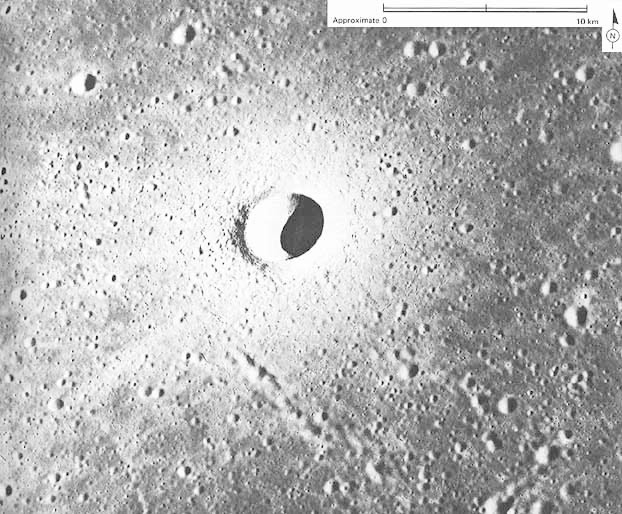

The Gamma more than 1:


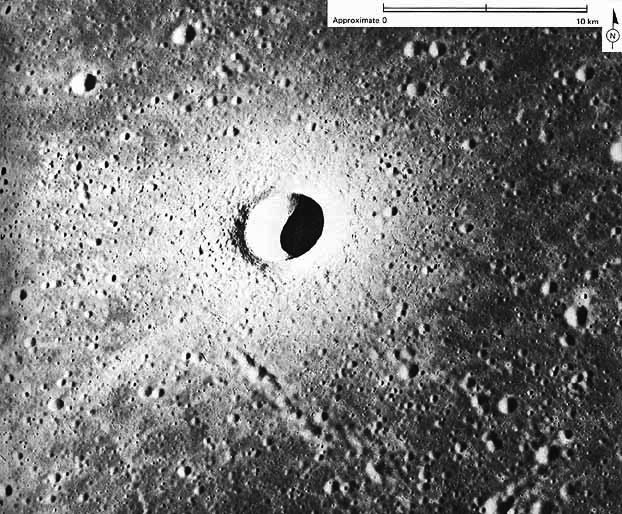

In [ ]:
image_path=input("Enter the path of the image:")
real_image=cv2.imread(image_path)
grayscale=cv2.cvtColor(real_image,cv2.COLOR_RGB2GRAY)
gamma1=float(input("Enter the value of gamma less than 1:"))
gamma2=float(input("Enter the value of gamma more than 1:"))


cv2_imshow(grayscale)

grayscale=grayscale/255
transformed_image1=1*np.power(grayscale,gamma1)
transformed_image1=transformed_image1*255

transformed_image2=1*np.power(grayscale,gamma2)
transformed_image2=transformed_image2*255

print("The Gamma less than 1:")
cv2_imshow(transformed_image1)

print("The Gamma more than 1:")
cv2_imshow(transformed_image2)
# print(transformed_image)


**Histogram** Based Transformation

Enter the path of the image/content/drive/MyDrive/Colab Notebooks/Data/Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png


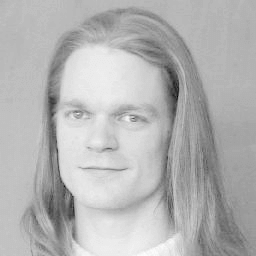

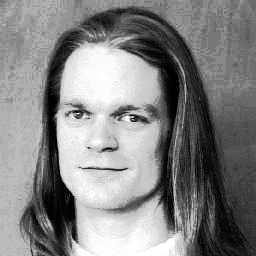

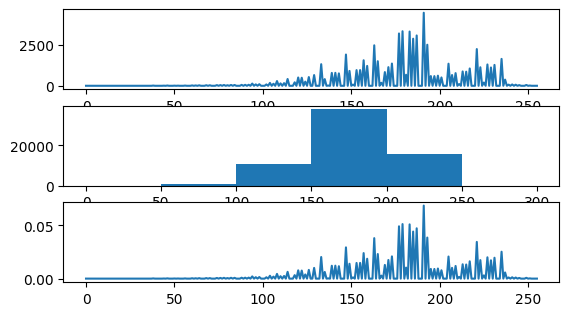

In [ ]:
image_path=input("Enter the path of the image")
real_image=cv2.imread(image_path)

grayscale=cv2.cvtColor(real_image,cv2.COLOR_RGB2GRAY)
freq=np.zeros(256)

pixels=[]
for i in range(grayscale.shape[0]):
  for j in range(grayscale.shape[1]):
    freq[grayscale[i][j]]+=1
    pixels.append(grayscale[i][j])

plt.subplot(4,1,1)
plt.plot(np.arange(256),freq)

plt.subplot(4,1,2)
# plt.hist(freq,bins=np.arange(256))
plt.hist(pixels,bins=[0,50,100,150,200,250,300])

freq=freq/(grayscale.shape[0]*grayscale.shape[1])

plt.subplot(4,1,3)
plt.plot(np.arange(256),freq)

for i in range(1,256):
  freq[i]=freq[i-1]+freq[i]

#Now we have got the cumulative probability

#Now tranforming the image
transformed_image=np.zeros([grayscale.shape[0],grayscale.shape[1]])
for i in range(grayscale.shape[0]):
  for j in range(grayscale.shape[1]):
    transformed_image[i][j]=round(255*freq[grayscale[i][j]],0)


# transformed_image*=255
cv2_imshow(grayscale)
cv2_imshow(transformed_image)




